In [182]:
!pip install pymysql

In [183]:
import pymysql

In [184]:
# sql 서버 정보를 입력
_db = pymysql.connect(
    user='root',
    password='user',
    host='localhost',
    db= 'os',
    port=3306
)

In [185]:
# cursor 생성
cursor = _db.cursor()

cursor2 = _db.cursor(pymysql.cursors.DictCursor)


In [186]:
sql = """
    select
    *
    from
    offline
"""

In [187]:
cursor.execute(sql)
cursor2.execute(sql)

1213

In [188]:
result = cursor.fetchall()
off_result = cursor2.fetchall()
result

((201901, '백화점', 1, 1, 1, 7600),
 (201901, '백화점', 1, 10, 379, 19458720),
 (201901, '백화점', 1, 80, 11198, 1186133303),
 (201901, '백화점', 1, 90, 468, 29194852),
 (201901, '백화점', 2, 0, 2, 128200),
 (201901, '백화점', 2, 1, 9, 269780),
 (201901, '백화점', 2, 10, 1168, 65231910),
 (201901, '백화점', 2, 80, 17043, 1922992702),
 (201901, '백화점', 2, 90, 352, 31497571),
 (201901, '할인점', 1, 1, 1, 17350),
 (201901, '할인점', 1, 10, 453, 17918368),
 (201901, '할인점', 1, 80, 11415, 409567088),
 (201901, '할인점', 1, 90, 520, 22246980),
 (201901, '할인점', 2, 0, 1, 19800),
 (201901, '할인점', 2, 10, 930, 28805016),
 (201901, '할인점', 2, 80, 10797, 429026707),
 (201901, '할인점', 2, 90, 218, 9756017),
 (201901, '슈퍼마켓', 1, 1, 3, 63940),
 (201901, '슈퍼마켓', 1, 10, 1487, 18653411),
 (201901, '슈퍼마켓', 1, 20, 148071, 2022670993),
 (201901, '슈퍼마켓', 1, 70, 91667, 1921712965),
 (201901, '슈퍼마켓', 1, 80, 16548, 378103297),
 (201901, '슈퍼마켓', 1, 90, 587, 15072682),
 (201901, '슈퍼마켓', 2, 0, 23, 731100),
 (201901, '슈퍼마켓', 2, 1, 2, 13200),
 (201901, 

In [189]:
result2

[{'crym': 201901,
  'tco_btc_nm': '백화점',
  'ma_fem_dc': 1,
  'agegrp_dc': 1,
  'tco_btc_u_ct': 1,
  'tco_btc_u_am': 7600},
 {'crym': 201901,
  'tco_btc_nm': '백화점',
  'ma_fem_dc': 1,
  'agegrp_dc': 10,
  'tco_btc_u_ct': 379,
  'tco_btc_u_am': 19458720},
 {'crym': 201901,
  'tco_btc_nm': '백화점',
  'ma_fem_dc': 1,
  'agegrp_dc': 80,
  'tco_btc_u_ct': 11198,
  'tco_btc_u_am': 1186133303},
 {'crym': 201901,
  'tco_btc_nm': '백화점',
  'ma_fem_dc': 1,
  'agegrp_dc': 90,
  'tco_btc_u_ct': 468,
  'tco_btc_u_am': 29194852},
 {'crym': 201901,
  'tco_btc_nm': '백화점',
  'ma_fem_dc': 2,
  'agegrp_dc': 0,
  'tco_btc_u_ct': 2,
  'tco_btc_u_am': 128200},
 {'crym': 201901,
  'tco_btc_nm': '백화점',
  'ma_fem_dc': 2,
  'agegrp_dc': 1,
  'tco_btc_u_ct': 9,
  'tco_btc_u_am': 269780},
 {'crym': 201901,
  'tco_btc_nm': '백화점',
  'ma_fem_dc': 2,
  'agegrp_dc': 10,
  'tco_btc_u_ct': 1168,
  'tco_btc_u_am': 65231910},
 {'crym': 201901,
  'tco_btc_nm': '백화점',
  'ma_fem_dc': 2,
  'agegrp_dc': 80,
  'tco_btc_u_ct': 17043,

In [190]:
import pandas as pd

In [191]:
off_result = pd.DataFrame(off_result)
off_result.columns = ['기준년월','업종','성별','연령대','총이용건수','총이용금액']
off_result['기준년월'] = pd.to_datetime(off_result['기준년월'], format='%Y%m')

### 문제
    1. 데이터베이스에 있는 offline 테이블을 로드하여 데이터프레임으로 변환
    2. 데이터프레임의 컬럼 이름 변경 -> ['기준년월','업종','성별','연령대','총이용건수','총이용금액']
    3. 기준년월 컬럼 데이터 타입을 시계열 데이터로 변경
    4. 데이터베이스에 있는 online 테이블을 로드하여 데이터프레임으로 변환
    5. 온라인 데이터프레임 컬럼 이름 변경 -> ['기준년월','성별','연령대','총이용건수','총이용금액']
    6. 파생변수('업종') 생성하여 데이터는 '온라인' 대입
    7. 두 개의 데이터프레임을 단순 행 결합
    8. 기준년월, 업종 별로 그룹화 하여 총 이용금액의 합계를 출력하고 라인 그래프로 시각화

In [192]:
sql2 = """
    select
    *
    from
    online
"""

In [193]:
cursor2.execute(sql2)

255

In [194]:
on_result = cursor2.fetchall()
on_result = pd.DataFrame(on_result)
on_result

,crym,ma_fem_dc,agegrp_dc,tco_btc_u_ct,tco_btc_u_am
0,201901,1,1,1,110685
1,201901,1,10,2333,98108225
2,201901,1,80,5632,607601993
3,201901,1,90,196,21542552
4,201901,2,0,1,1000
...,...,...,...,...,...
250,202109,1,90,867,141519898
251,202109,2,0,111,2836817
252,202109,2,10,3366,175196074
253,202109,2,80,20094,1935122483


In [195]:
on_result.columns = ['기준년월','성별','연령대','총이용건수','총이용금액']
on_result['기준년월'] = pd.to_datetime(on_result['기준년월'], format='%Y%m')
on_result['업종'] = '온라인'
on_result

,기준년월,성별,연령대,총이용건수,총이용금액,업종
0,2019-01-01,1,1,1,110685,온라인
1,2019-01-01,1,10,2333,98108225,온라인
2,2019-01-01,1,80,5632,607601993,온라인
3,2019-01-01,1,90,196,21542552,온라인
4,2019-01-01,2,0,1,1000,온라인
...,...,...,...,...,...,...
250,2021-09-01,1,90,867,141519898,온라인
251,2021-09-01,2,0,111,2836817,온라인
252,2021-09-01,2,10,3366,175196074,온라인
253,2021-09-01,2,80,20094,1935122483,온라인


In [196]:
total = pd.concat([on_result,off_result], axis=0)
total

,기준년월,성별,연령대,총이용건수,총이용금액,업종
0,2019-01-01,1,1,1,110685,온라인
1,2019-01-01,1,10,2333,98108225,온라인
2,2019-01-01,1,80,5632,607601993,온라인
3,2019-01-01,1,90,196,21542552,온라인
4,2019-01-01,2,0,1,1000,온라인
...,...,...,...,...,...,...
1208,2021-09-01,2,10,2115,14879960,편의점
1209,2021-09-01,2,60,243768,1997441975,편의점
1210,2021-09-01,2,70,40523,352420260,편의점
1211,2021-09-01,2,80,6349,53334882,편의점


In [199]:
t_result = total[['기준년월','업종','총이용금액']].groupby(['기준년월','업종']).sum()
t_result

총이용금액
기준년월       업종              
2019-01-01 백화점   3254914638
           슈퍼마켓  4826079794
           온라인   1735223701
           편의점   2430064480
           할인점    917357326
...                     ...
2021-09-01 백화점   3216821370
           슈퍼마켓  1523527130
           온라인   3579806418
           편의점   4734795649
           할인점   2918148989

[165 rows x 1 columns]

In [200]:
import matplotlib.pyplot as plt
import platform

if platform.system() == 'Darwin':
    plt.rc('font',family='AppleGothic')
else : 
    plt.rc('font',family='Malgun Gothic')


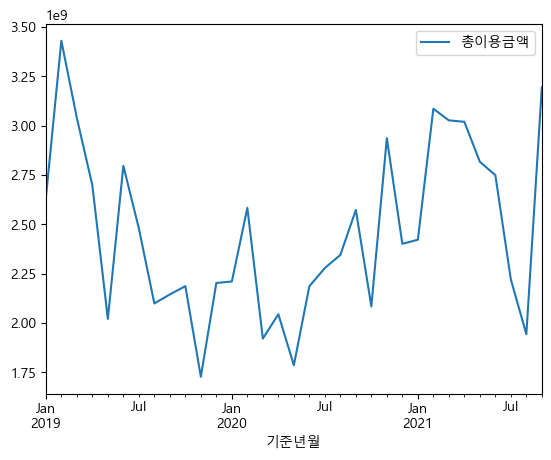

In [202]:
pivot_data = pd.pivot_table(
    t_result, 
    index=['기준년월'],
    values=['총이용금액']
)

pivot_data.plot.line()
plt.show()